# <span style="text-decoration: underline">AOS 51 Lab: Data Analysis for Climate Science Session #2</span>
# <span>🌎🔥 👩🏿‍💻👩🏾‍💻 👨🏽‍💻👩🏼‍💻 👨🏼‍💻👨🏾‍💻👩🏽‍💻 👨🏿‍💻</span>

#### In the first lab session, we learned about one-dimensional time series of climate data. These took the form of lists, Numpy arrays, or Pandas Series.

#### Today, we'll extend our data analysis skills to examine two-dimensional datasets. We'll work entirely within Pandas and learn how powerful it can be when working with text or comma-separated-value (CSV) files.
---

In [11]:
# Let's import the pandas library and rename it to pd
import pandas as pd

# Creating DataFrames

Recall that a Pandas Series is simply a 1D time series of data point with a labelled index. 

Oftentimes, we'll be working with time series of multiple variables (for instance, precipitation and temperature), and for that, we'll want to use a "DataFrame".

Let's create a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) using three Series of monthly mean, max, and min temperatures over LA spanning during 2017:

In [12]:
tavg = pd.Series([55.8, 57.2, 61.0, 63.6, 63.3, 66.7, 71.7, 72.0, 71.5, 71.5, 65.6, 61.4])
tmax = pd.Series([62.7, 62.6, 69.3, 71.9, 69.4, 72.6, 77.5, 77.3, 78.5, 80.4, 73.7, 72.4])
tmin = pd.Series([48.8, 51.8, 52.8, 55.4, 57.1, 60.9, 65.8, 66.8, 64.6, 62.5, 57.3, 50.3])

DataFrames are usually abbreviated as "df".

An empty DataFrame is initialized with:

In [13]:
df = pd.DataFrame()

We can populate data into the DataFrame using the syntax:

`df[Column Name] = Column Data`

where:
   * `Column Name"` is the user-specified name of the column
   * `Column Data` is the Series (OR list OR 1D numpy array) of data for that column

Let's assign the `tavg` Series a column name of "TAVG" and input that data into the DataFrame.

In [14]:
df['TAVG'] = tavg
df # print(df) also works, but loses the fancy row coloring

,TAVG
0,55.8
1,57.2
2,61.0
3,63.6
4,63.3
5,66.7
6,71.7
7,72.0
8,71.5
9,71.5


---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Add two new columns of data to `df` above:
   * `TMIN` - 2017 monthly min temperatures over LA
   * `TMAX` - 2017 monthly max temperatures over LA

Then print the `df` to confirm that it has three columns of data.

---

In [15]:
df['TMIN'] = tmin
df['TMAX'] = tmax
df

,TAVG,TMIN,TMAX
0,55.8,48.8,62.7
1,57.2,51.8,62.6
2,61.0,52.8,69.3
3,63.6,55.4,71.9
4,63.3,57.1,69.4
5,66.7,60.9,72.6
6,71.7,65.8,77.5
7,72.0,66.8,77.3
8,71.5,64.6,78.5
9,71.5,62.5,80.4


# DatetimeIndex for DataFrames 🕰

Just as we did for Series, we can modify the Index to be a range of dates using the [pd.date_range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function and then assign the DataFrame Index to those dates.

Let's create a date range of months in 2017:

In [16]:
dates = pd.date_range(start='2017-01-01', end='2017-12-01', freq='MS')
print(dates)

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')


Now we can reset the Index of `df` to those dates with:

In [17]:
df.index = dates
df

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


# Viewing and Summarizing DataFrames 🕵

With `head` and `tail`, we can quick view N number of rows from the start (head) or end (tail) of a DataFrame:

In [19]:
df.head(1) # first row

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7


In [18]:
df.head(4) # first 4 rows

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9


In [21]:
df.tail(1) # the last row

,TAVG,TMIN,TMAX
2017-12-01,61.4,50.3,72.4


In [22]:
df.tail(3) # the last 3 rows

,TAVG,TMIN,TMAX
2017-10-01,71.5,62.5,80.4
2017-11-01,65.6,57.3,73.7
2017-12-01,61.4,50.3,72.4


**We can also get a statistical summary of the DataFrame using `describe`**

In [26]:
df.describe() # the count, mean, standard dev., min, max, and quartiles of each column

,TAVG,TMIN,TMAX
count,12.000000,12.000000,12.000000
mean,65.108333,57.841667,72.358333
std,5.727042,6.235304,5.736083
min,55.800000,48.800000,62.600000
25%,61.300000,52.550000,69.375000
50%,64.600000,57.200000,72.500000
75%,71.500000,63.025000,77.350000
max,72.000000,66.800000,80.400000


---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Below are two lists of 2006 - 2015 annual average temperature and rainfall.

Instructions:

1. Create a new DataFrame called `sample_df` containing the temperature and rainfall data as columns and a DatetimeIndex of years spanning 2006 through 2015. 
2. Print a statistical summary of the `sample_df`.

In [35]:
# 2006 - 2015 sample temperature (degrees F) and rainfall (inches) data
sample_t = [45.5, 48.9, 51.2, 47,2, 44.4, 44.1, 40.0, 52.3, 50.6]
sample_p = [9.2, 10.3, 12.2, 7.2, 13.1, 9.0, 4.8, 5.2, 8.7, 8.1]

In [40]:
sample_df = pd.DataFrame()
sample_df['T'] = sample_t
sample_df['P'] = sample_p
sample_df.index = pd.date_range(start='2006', end='2015', freq='AS')
print(sample_df)
print(sample_df.describe())

               T     P
2006-01-01  45.5   9.2
2007-01-01  48.9  10.3
2008-01-01  51.2  12.2
2009-01-01  47.0   7.2
2010-01-01   2.0  13.1
2011-01-01  44.4   9.0
2012-01-01  44.1   4.8
2013-01-01  40.0   5.2
2014-01-01  52.3   8.7
2015-01-01  50.6   8.1
               T          P
count  10.000000  10.000000
mean   42.600000   8.780000
std    14.757747   2.677395
min     2.000000   4.800000
25%    44.175000   7.425000
50%    46.250000   8.850000
75%    50.175000  10.025000
max    52.300000  13.100000


# Slicing DataFrames 🔪

We will frequently want to only work with a subset of an entire DataFrame. 

Let's learn how to:

  1. Extract individual columns of data from a DataFrame
  2. Slice rows and columns of data inside a DataFrame

**1. Extracting individual columns of data**

Recall that the code for inserting a column of data in a DataFrame is:

`df[Column Name] = Column of Data`

The reverse of that command will extract a column of data from the DataFrame:

`Column of Data = df[Column Name]`

In [42]:
# Extracting TMIN from the df
tmin = df['TMIN']
print(tmin)

2017-01-01    48.8
2017-02-01    51.8
2017-03-01    52.8
2017-04-01    55.4
2017-05-01    57.1
2017-06-01    60.9
2017-07-01    65.8
2017-08-01    66.8
2017-09-01    64.6
2017-10-01    62.5
2017-11-01    57.3
2017-12-01    50.3
Freq: MS, Name: TMIN, dtype: float64


**2. Slicing rows/columns inside a DataFrame**

The general syntax to slice by row/column location ("loc") is:

`df.loc[row_selection, column_selection]`

Row and column selections can be:

   * a single value, e.g. '2017-01-01' or 'TMAX' 
   * a list of values, e.g. ['2017-01-01', '2017-01-02'] or ['TMAX', 'TMIN']
   * a range of values, e.g. ['2017-01-01':'2017-01-10']
   
Let's demonstate with examples on `df`:

In [47]:
# Slice a single row of 2017-05
df.loc['2017-05']

,TAVG,TMIN,TMAX
2017-05-01,63.3,57.1,69.4


In [68]:
# Slice a single row of 2017-01-01 and TAVG (brackets around TAVG are optional, try without!)
df.loc['2017-01-01', ['TAVG']]

TAVG    55.8
Name: 2017-01-01 00:00:00, dtype: float64

In [69]:
# slice two non-consecutive rows of 2017-01 and 2017-05
df.loc[['2017-01', '2017-05']]

KeyError: "None of [['2017-01', '2017-05']] are in the [index]"

Uh oh...what happened?! 

Sometimes, when you tell Pandas to search for a list of items that are strings (like '2017-05-01'), it does not know to convert them to Pandas Timestamps and search for those Timestamps in the Index. 

So, we need to convert these dates from a string to a Pandas [Timestamp](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html). 

In [53]:
# slice rows by label: rows of '2017-01-01' and '2017-05-01'
df.loc[[pd.Timestamp('2017-01'), pd.Timestamp('2017-05')]]

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-05-01,63.3,57.1,69.4


**Voila!**

In [55]:
# Slice a range of months from 2017-01-01 to 2017-05-01 for TMIN and TMAX
df.loc['2017-01':'2017-05', ['TMIN', 'TMAX']]

,TMIN,TMAX
2017-01-01,48.8,62.7
2017-02-01,51.8,62.6
2017-03-01,52.8,69.3
2017-04-01,55.4,71.9
2017-05-01,57.1,69.4


---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

1. Slice row 2017-08 and column TMAX
2. Slice the range of rows 2017-05 through 2017-10 and columns TAVG and TMIN
3. Slice rows 2017-03 and 2017-08 and column TMIN
---

In [84]:
#df.loc['2017-08', ['TMAX']] # brackets around 'TMAX' are optional 
#df.loc['2017-05':'2017-10', ['TAVG', 'TMAX']]
#df.loc[[pd.Timestamp('2017-03'), pd.Timestamp('2017-08')], ['TMIN']] # brackets around 'TMIN' are optional

# DataFrame Statistics 

Recall that standard statistics (like mean, min, max) on Series were found with, for example:

In [85]:
sample_series = pd.Series([12.1, 10.9, 5.5, 3.2, 7,5])
series_mean = sample_series.mean()
print(series_mean)

7.283333333333334


Similarly, we can compute standard statistics on DataFrames with only one extra bit of information -  we need to specify whether that statistic should be performed along the row-axis or the column-axis.

Axes are numbered 0 or 1, with **axis=0 for calculations across rows** and **axis=1 for calculations across columns.** 

Let's demonstrate on `df`:

In [86]:
# Minimums across rows
df.min(axis=0)

TAVG    55.8
TMIN    48.8
TMAX    62.6
dtype: float64

In [87]:
# Minimums across columns (this equals the TMIN column!)
df.min(axis=1)

2017-01-01    48.8
2017-02-01    51.8
2017-03-01    52.8
2017-04-01    55.4
2017-05-01    57.1
2017-06-01    60.9
2017-07-01    65.8
2017-08-01    66.8
2017-09-01    64.6
2017-10-01    62.5
2017-11-01    57.3
2017-12-01    50.3
Freq: MS, dtype: float64

In [89]:
# Mean of TMAX across the first 6 months 
# "Chaining" or linking slicing and statistics together! 
df.loc['2017-01':'2017-06', 'TMAX'].mean(axis=0)

68.08333333333333

---
** --- In-class exercise --- **

Compute the minimum and maximum for each column of data in `temp_df`.

---

In [24]:
#temp_df.min(axis=0) # minimum TAVG, TMIN, and TMAX
temp_df.max(axis=0) # maximum TAVG, TMIN, and TMAX

TAVG    72.0
TMIN    66.8
TMAX    80.4
dtype: float64

# Column Arithmetic

Now that we know how to:
   * Create columns in a DataFrame
   * Extract coumns in a DataFrame
   * Code arithmetic using numpy/basic Python
  
we can easily create new columns of data by performing arithmetic on existing columns.

The general syntax is:

`df[new column name] = df[existing column] + [arithmetic on new column]`

For example, let's create new column called `TAVG(C)` where we convert `TAVG` (which is in units degrees F) to degrees C. 

In [26]:
temp_df['TAVG(C)'] = (temp_df['TAVG']-32) * (5/9)
temp_df

,TAVG,TMIN,TMAX,TAVG(C)
2017-01-01,55.8,48.8,62.7,13.222222
2017-02-01,57.2,51.8,62.6,14.000000
2017-03-01,61.0,52.8,69.3,16.111111
2017-04-01,63.6,55.4,71.9,17.555556
2017-05-01,63.3,57.1,69.4,17.388889
2017-06-01,66.7,60.9,72.6,19.277778
2017-07-01,71.7,65.8,77.5,22.055556
2017-08-01,72.0,66.8,77.3,22.222222
2017-09-01,71.5,64.6,78.5,21.944444
2017-10-01,71.5,62.5,80.4,21.944444


---
** In-class exercise **

1. Create a new column called `TMAX(K)` that converts `TMAX` from Fahrenheit to Kelvin. 

   Note: T(K) = T(F) + 459.67 x (5/9)
2. Create a new column called `TMIN(C-1.2)` that first converts `TMIN` from Fahrenheight to Celsius and then subtracts 1.2 degrees C from each item. 
---

In [53]:
temp_df['TAVG(K)'] = (temp_df['TAVG'] + 459.67) * (5/9)
temp_df['TMIN(C-1.2)'] = ((temp_df['TMIN'] - 32) * (5/9)) - 1.2
temp_df

,TAVG,TMIN,TMAX,TAVG(C),TAVG(K),TMIN(C-1.2)
2017-01-01,55.8,48.8,62.7,13.222222,286.372222,8.133333
2017-02-01,57.2,51.8,62.6,14.000000,287.150000,9.800000
2017-03-01,61.0,52.8,69.3,16.111111,289.261111,10.355556
2017-04-01,63.6,55.4,71.9,17.555556,290.705556,11.800000
2017-05-01,63.3,57.1,69.4,17.388889,290.538889,12.744444
2017-06-01,66.7,60.9,72.6,19.277778,292.427778,14.855556
2017-07-01,71.7,65.8,77.5,22.055556,295.205556,17.577778
2017-08-01,72.0,66.8,77.3,22.222222,295.372222,18.133333
2017-09-01,71.5,64.6,78.5,21.944444,295.094444,16.911111
2017-10-01,71.5,62.5,80.4,21.944444,295.094444,15.744444


# Plotting DataFrames

Plotting DataFrames has the same syntax as plotting Series:

`df.plot(kind = [kind of plot], color = [colors], title = "Plot title)`

In [54]:
# Line plots of TAVG, TMIN, TMAX
temp_df = temp_df[['TAVG', 'TMIN', 'TMAX']]
temp_df.plot(kind='line', 
             color=['green', 'blue', 'red'], 
             title='2017 LA Monthly Tavg, Tmax, Tmin (degrees F)')

---
**In-class exercise**

Seasonality of precipitation is vasty different across the US. Here are 2017 monthly precipitation amounts (unit: inches) across a few US cities - San Diego (SD), Miami (MIA), Detroit (DET). 

| |SD|MIA|DET|
|---|---|---|---|
|201701|3.02|3.41|2.84|
|201702|3.71|1.31|1.91|
|201703|0.08|3.93|4.26|
|201704|0.01|2.16|3.55|
|201705|0.92|2.69|4.38|
|201706|0.02|15.97|2.03|
|201707|0.00|12.45|2.44|
|201708|0.00|8.57|3.91|
|201709|0.08|14.97|0.91|
|201710|0.00|12.61|2.84|
|201711|0.02|4.41|4.93|
|201712|0.07|0.66|1.49|

1. Create a DataFrame storing this information with a Datetime Index.
2. Compute all the standard statistics of precipitation during 2017 for each city. 
3. Create a bar chart of this data.

              SD        MIA        DET
count  12.000000  12.000000  12.000000
mean    0.660833   6.927500   2.957500
std     1.297168   5.650537   1.260152
min     0.000000   0.660000   0.910000
25%     0.007500   2.557500   2.000000
50%     0.045000   4.165000   2.840000
75%     0.290000  12.490000   3.997500
max     3.710000  15.970000   4.930000


([<matplotlib.axis.XTick at 0x113827cc0>,
 <a list of 12 Text xticklabel objects>)

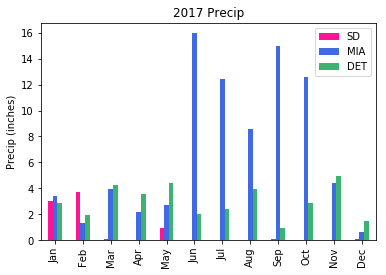

In [55]:
# Importing matplotlib for some customization of our Pandas plot
import matplotlib.pyplot as plt 

pr_df = pd.DataFrame()
pr_df['SD'] = [3.02, 3.71, 0.08, 0.01, 0.92, 0.02, 0.00, 0.00, 0.08, 0.00, 0.02, 0.07]
pr_df['MIA'] = [3.41, 1.31, 3.92, 2.16, 2.69, 15.97, 12.45, 8.57, 14.97, 12.61, 4.41, 0.66]
pr_df['DET'] = [2.84, 1.91, 4.26, 3.55, 4.38, 2.03, 2.44, 3.91, 0.91, 2.84, 4.93, 1.49]

stats = pr_df.describe()
print(stats)

pr_df.plot(kind='bar',
          color = ['deeppink', 'royalblue', 'mediumseagreen'],
          title = '2017 Precip')

# Customizations through Matplotlib (not covered in lecture)
plt.ylabel('Precip (inches)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])